In [1]:
import pandas as pd
from test_problems.quad_quadlet_w_external_param.src import beamsize_quadlet_w_external
from scripts.optimize_function import optimize_function
from scripts.characterize_emittance import characterize_emittance
from xopt import VOCS


def eval_beamsize(input_dict):
    beamsize_results = beamsize_quadlet_w_external(input_dict)
    beamsize_results["rms_x"] = (beamsize_results["m11"] ** 0.5) * 1e3
    beamsize_results["rms_y"] = (beamsize_results["m22"] ** 0.5) * 1e3

    return beamsize_results

def eval_emit(input_data):
    opt_vocs = VOCS(
        variables = {"k1":[0,100], "k2":[-100,0], "k3":[0,100]},
        constants = {"k4":0.0, "s":input_data["s"]},
        objectives = {"total_size": "MINIMIZE"}
    )
    opt_x = optimize_function(
        opt_vocs, eval_beamsize, n_iterations=30,
    )

    emit_vocs = VOCS(
        variables = {"k4":[-300,300]},
        observables = ["rms_x", "rms_y"],
        constants = opt_x.data.iloc[-1][["k1","k2","k3","s"]].to_dict()
    )

    quad_length = 0.01
    drift_length = 0.5

    emit_results, emit_X = characterize_emittance(
        emit_vocs,
        eval_beamsize,
        quad_length,
        drift_length,
        quad_strength_key="k4",
        rms_x_key="rms_x",
        rms_y_key="rms_y",
        quad_scan_analysis_kwargs={"visualize": True}
    )

    total_data = pd.concat((opt_x.data, emit_X.data), ignore_index=True)
    return emit_results, total_data

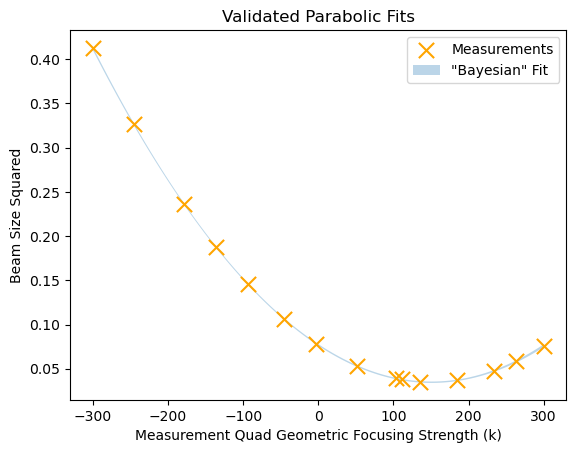

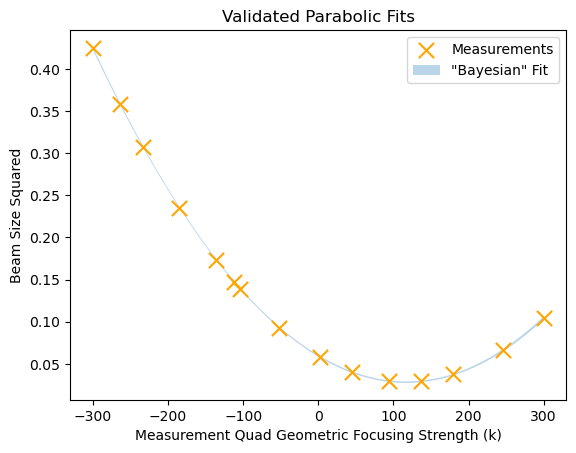

In [2]:
result, total_data = eval_emit({"s":1.0})

In [5]:
print(total_data)

           k1         k2         k3          k4    s           m11  \
0   29.988313 -90.509174  59.530854    0.000000  1.0  5.114617e-07   
1   30.939156 -46.767603  18.977751    0.000000  1.0  4.739324e-07   
2   60.946566 -90.486665  14.451851    0.000000  1.0  3.291017e-07   
3   14.462516 -62.727882  93.810280    0.000000  1.0  2.535185e-08   
4   86.148821 -11.303725  35.910054    0.000000  1.0  2.604913e-06   
5   39.743124 -80.942670  11.767799    0.000000  1.0  8.246458e-07   
6   10.000030 -68.950583  66.147223    0.000000  1.0  7.326433e-07   
7   51.787034 -94.713611  88.451141    0.000000  1.0  8.575667e-08   
8   49.843377 -83.585720  61.619482    0.000000  1.0  9.295854e-08   
9   83.746630 -92.739791  63.984644    0.000000  1.0  1.173923e-06   
10  54.330758 -98.913015  77.793513    0.000000  1.0  9.521050e-08   
11  42.470242 -70.674729  88.211226    0.000000  1.0  6.758638e-08   
12   0.691669 -48.345359  78.031505    0.000000  1.0  2.548429e-07   
13   3.556309 -47.07